In [ ]:
#Taufik Kurahman Sasmita
#1103200008
#CNN With NiN

In [13]:
!pip install -U d2l
import d2l
from d2l import tensorflow as d2l
import tensorflow as tf

##**Membuat Model NiN**

In [14]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D

def nin_block(num_channels, kernel_size, strides, padding):
    return tf.keras.Sequential([
        Conv2D(num_channels, kernel_size, strides=strides, padding=padding, activation='relu'),
        Conv2D(num_channels, 1, activation='relu'),
        Conv2D(num_channels, 1, activation='relu')
    ])

def nin_model():
    net = tf.keras.Sequential()
    net.add(nin_block(96, kernel_size=11, strides=4, padding='valid'))
    net.add(MaxPooling2D(pool_size=3, strides=2))
    net.add(nin_block(256, kernel_size=5, strides=1, padding='same'))
    net.add(MaxPooling2D(pool_size=3, strides=2))
    net.add(nin_block(384, kernel_size=3, strides=1, padding='same'))
    net.add(MaxPooling2D(pool_size=3, strides=2))
    net.add(tf.keras.layers.Dropout(0.5))
    net.add(Conv2D(10, kernel_size=3, padding='same'))
    net.add(GlobalAveragePooling2D())
    net.add(Dense(10))
    return net

model = nin_model()


##**Mendifinisikan Model NiN**

In [15]:
def nin_block(num_channels, kernel_size, strides, padding):
    blk = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(num_channels, kernel_size, strides=strides, padding=padding, activation='relu'),
        tf.keras.layers.Conv2D(num_channels, kernel_size=1, activation='relu'),
        tf.keras.layers.Conv2D(num_channels, kernel_size=1, activation='relu')
    ])
    return blk

model = tf.keras.models.Sequential([
    nin_block(96, kernel_size=11, strides=4, padding='valid'),
    tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
    nin_block(256, kernel_size=5, strides=1, padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
    nin_block(384, kernel_size=3, strides=1, padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
    tf.keras.layers.Dropout(0.5),
    nin_block(10, kernel_size=3, strides=1, padding='same'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Reshape((1, 1, 10)),
    tf.keras.layers.Flatten(),
])

In [19]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D, Dropout
import tensorflow as tf

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert class vectors to binary class matrices (one-hot encoding)
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Define NiN model
def nin_block(num_channels, kernel_size, strides, padding):
    return tf.keras.Sequential([
        Conv2D(num_channels, kernel_size, strides=strides, padding=padding, activation='relu'),
        Conv2D(num_channels, 1, activation='relu'),
        Conv2D(num_channels, 1, activation='relu')
    ])

def nin_model():
    input_layer = Input(shape=(32, 32, 3))
    net = nin_block(96, kernel_size=11, strides=4, padding='valid')(input_layer)
    net = MaxPooling2D(pool_size=3, strides=2, padding='same')(net)  # Adjusted pooling layer
    net = nin_block(256, kernel_size=5, strides=1, padding='same')(net)
    net = MaxPooling2D(pool_size=3, strides=2, padding='same')(net)  # Adjusted pooling layer
    net = nin_block(384, kernel_size=3, strides=1, padding='same')(net)
    net = GlobalAveragePooling2D()(net)
    net = Dropout(0.5)(net)
    output_layer = Dense(10, activation='softmax')(net)
    model = Model(inputs=input_layer, outputs=output_layer)
    return model

# Compile the model
model = nin_model()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)


Epoch 1/10
391/391 [==============================] - 192s 486ms/step - loss: 2.0304 - accuracy: 0.2092 - val_loss: 1.8070 - val_accuracy: 0.3050
Epoch 2/10
391/391 [==============================] - 190s 485ms/step - loss: 1.6692 - accuracy: 0.3656 - val_loss: 1.5895 - val_accuracy: 0.4043
Epoch 3/10
391/391 [==============================] - 195s 498ms/step - loss: 1.5260 - accuracy: 0.4389 - val_loss: 1.4738 - val_accuracy: 0.4621
Epoch 4/10
391/391 [==============================] - 188s 481ms/step - loss: 1.4187 - accuracy: 0.4846 - val_loss: 1.3911 - val_accuracy: 0.5051
Epoch 5/10
391/391 [==============================] - 188s 480ms/step - loss: 1.3454 - accuracy: 0.5172 - val_loss: 1.3626 - val_accuracy: 0.5177
Epoch 6/10
391/391 [==============================] - 188s 480ms/step - loss: 1.2743 - accuracy: 0.5431 - val_loss: 1.2744 - val_accuracy: 0.5475
Epoch 7/10
391/391 [==============================] - 189s 483ms/step - loss: 1.2047 - accuracy: 0.5687 - val_loss: 1.3024 -

In [20]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)


313/313 - 5s - loss: 1.2956 - accuracy: 0.5637 - 5s/epoch - 15ms/step

Test accuracy: 0.5637000203132629


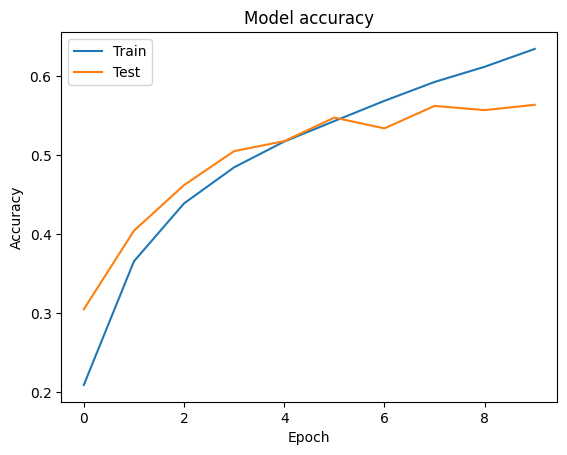

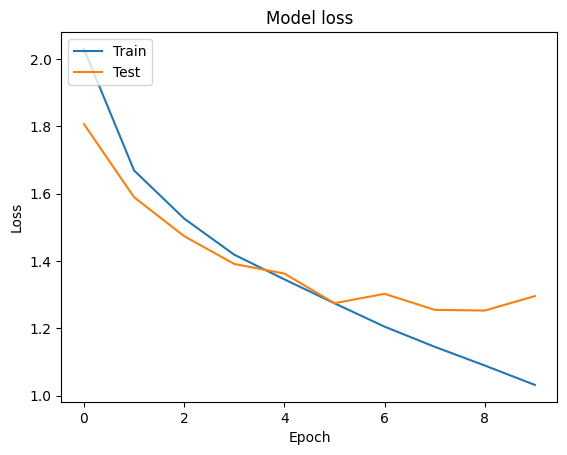

In [21]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
